In [1]:
import tensorflow as tf
import pandas as pd 
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

In [2]:
# Define Constants by re-sizing all the images
image_size = [224, 224]
batch_size = 32

train_path = 'D:/Kuliah/Skripsi/Dataset/tomato/train'
valid_path = 'D:/Kuliah/Skripsi/Dataset/tomato/val'
test_path = 'D:/Kuliah/Skripsi/Dataset/tomato/test'

In [3]:
# Import the InceptionV3 model and here we will be using imagenet weights

inception = InceptionV3(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [4]:
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
# Folders in the Training Set
folders = glob('D:/Kuliah/Skripsi/Dataset/tomato/train/*')
folders

['D:/Kuliah/Skripsi/Dataset/tomato/train\\Bacterial Spot',
 'D:/Kuliah/Skripsi/Dataset/tomato/train\\Early Blight',
 'D:/Kuliah/Skripsi/Dataset/tomato/train\\Healthy',
 'D:/Kuliah/Skripsi/Dataset/tomato/train\\Late Blight',
 'D:/Kuliah/Skripsi/Dataset/tomato/train\\Leaf Mold',
 'D:/Kuliah/Skripsi/Dataset/tomato/train\\Mosaic Virus',
 'D:/Kuliah/Skripsi/Dataset/tomato/train\\Septoria Leaf Spot',
 'D:/Kuliah/Skripsi/Dataset/tomato/train\\Spider Mites',
 'D:/Kuliah/Skripsi/Dataset/tomato/train\\Target Spot',
 'D:/Kuliah/Skripsi/Dataset/tomato/train\\Yellow Leaf Curl Virus']

In [6]:
# Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [8]:
# Defining the cost and model optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# Training Generator
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = image_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 8000 images belonging to 10 classes.


In [11]:
# Testing Generator
test_set = test_datagen.flow_from_directory(train_path,
                                            target_size = image_size,
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

Found 8000 images belonging to 10 classes.


In [12]:
class_names = list(training_set.class_indices.keys())

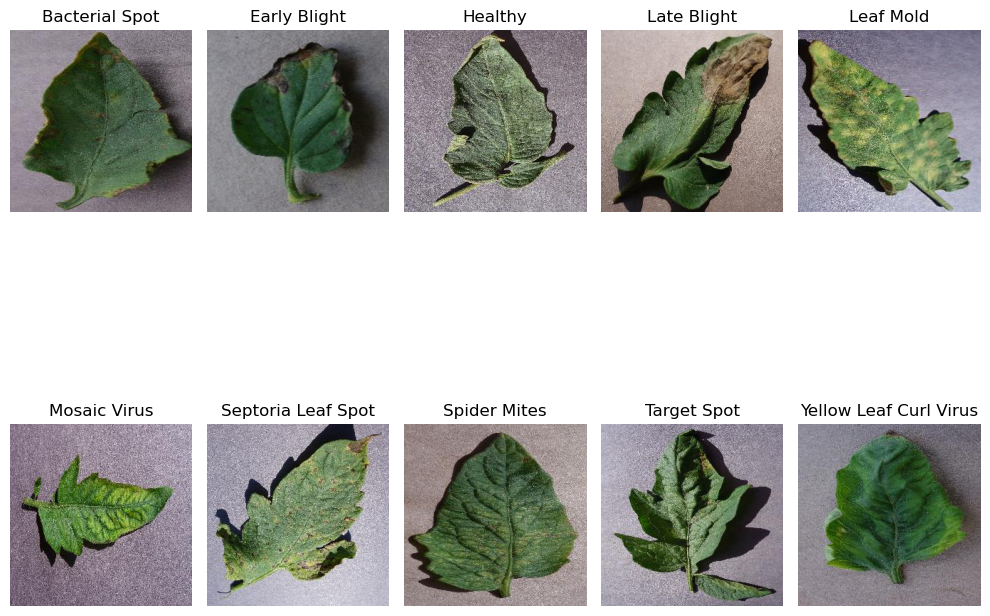

In [13]:
# Menyiapkan figure untuk menampilkan gambar

fig, axes = plt.subplots(nrows=2 ,ncols=5, figsize=(10, 10))
axes = axes.flatten()  # Mengubah matriks sumbu menjadi array 1D

# Menampilkan satu gambar dari setiap kelas
for i, class_name in enumerate(class_names):
    # Mendapatkan daftar file gambar untuk kelas tertentu
    class_dir = os.path.join(training_set.directory, class_name)
    file_names = os.listdir(class_dir)

    # Memilih gambar secara acak
    random_image = random.choice(file_names)
    image_path = os.path.join(class_dir, random_image)

    # Membaca dan menampilkan gambar
    image = load_img(image_path)
    axes[i].imshow(image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\user\AppData\Local\Temp\ipykernel_7188\985405674.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/100
250/250 [==============================] - 595s 2s/step - loss: 3.2519 - accuracy: 0.6317 - val_loss: 1.5200 - val_accuracy: 0.7878
Epoch 2/100
250/250 [==============================] - 573s 2s/step - loss: 2.0195 - accuracy: 0.7599 - val_loss: 1.0864 - val_accuracy: 0.8505
Epoch 3/100
250/250 [==============================] - 584s 2s/step - loss: 1.8948 - accuracy: 0.7944 - val_loss: 1.4258 - val_accuracy: 0.8224
Epoch 4/100
250/250 [==============================] - 558s 2s/step - loss: 1.7713 - accuracy: 0.8146 - val_loss: 1.1306 - val_accuracy: 0.8635
Epoch 5/100
250/250 [==============================] - 563s 2s/step - loss: 1.5761 - accuracy: 0.8443 - val_loss: 1.1404 - val_accuracy: 0.8658
Epoch 6/100
250/250 [==============================] - 699s 3s/step - loss: 1.6208 - accuracy: 0.8468 - val_loss: 0.9885 - val_accuracy: 0.8910
Epoch 7/100
250/250 [==============================] - 730s 3s/step - loss: 1.5807 - accuracy: 0.8597 - val_loss: 1.0815 - val_accuracy:

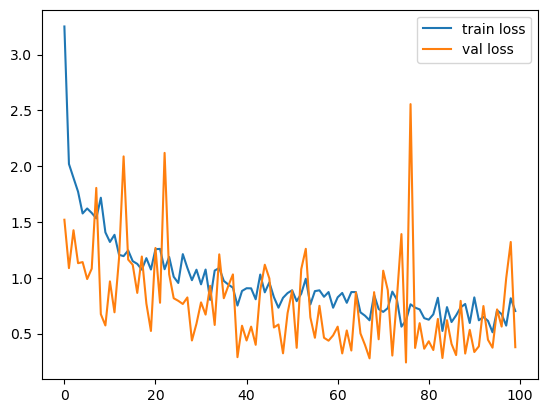

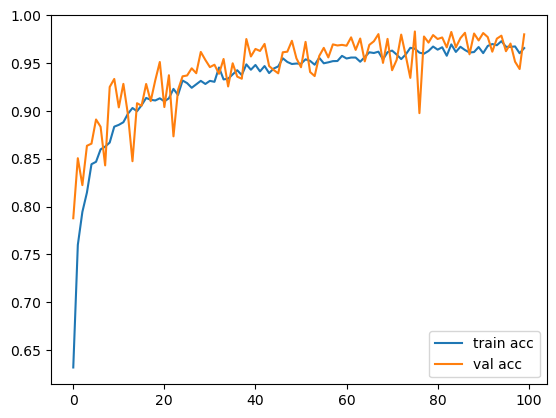

<Figure size 640x480 with 0 Axes>

In [15]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [8]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('Dataset80%100epoch.h5')

In [17]:
y_pred = model.predict(test_set)
y_pred

250/250 [==============================] - 359s 1s/step


array([[0.0000000e+00, 1.0670646e-21, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [9.9999994e-01, 2.4115950e-35, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0140155e-33, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [18]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([3, 0, 6, ..., 0, 0, 4], dtype=int64)